<a href="https://colab.research.google.com/github/atharvv8/Plant-Disease-Detection/blob/main/pdd_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
print(tf.__version__)
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

2.12.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/

In [ ]:
#import zipfile
#with zipfile.ZipFile('Dataset.zip', 'r') as zip_ref:
 #   zip_ref.extractall()

In [ ]:
train_gen = image_dataset_from_directory(directory="Augmented Plant Diseases/train",
                                         image_size=(256,256))
test_gen = image_dataset_from_directory(directory="Augmented Plant Diseases/valid",
                                        image_size=(256, 256))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [ ]:
rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                    

In [ ]:
history = model.fit_generator(train_gen,validation_data=test_gen,epochs = 10)

Epoch 1/10
2197/2197 [==============================] - 202s 88ms/step - loss: 1.4186 - accuracy: 0.5870 - val_loss: 0.6647 - val_accuracy: 0.7876
Epoch 2/10
2197/2197 [==============================] - 210s 95ms/step - loss: 0.4211 - accuracy: 0.8676 - val_loss: 0.2909 - val_accuracy: 0.9030
Epoch 3/10
2197/2197 [==============================] - 209s 95ms/step - loss: 0.2449 - accuracy: 0.9208 - val_loss: 0.2853 - val_accuracy: 0.9089
Epoch 4/10
2197/2197 [==============================] - 209s 95ms/step - loss: 0.1660 - accuracy: 0.9464 - val_loss: 0.2323 - val_accuracy: 0.9280
Epoch 5/10
2197/2197 [==============================] - 210s 95ms/step - loss: 0.1201 - accuracy: 0.9603 - val_loss: 0.1489 - val_accuracy: 0.9539
Epoch 6/10
2197/2197 [==============================] - 209s 95ms/step - loss: 0.0942 - accuracy: 0.9691 - val_loss: 0.1826 - val_accuracy: 0.9481
Epoch 7/10
2197/2197 [==============================] - 209s 95ms/step - loss: 0.0781 - accuracy: 0.9748 - val_loss: 0

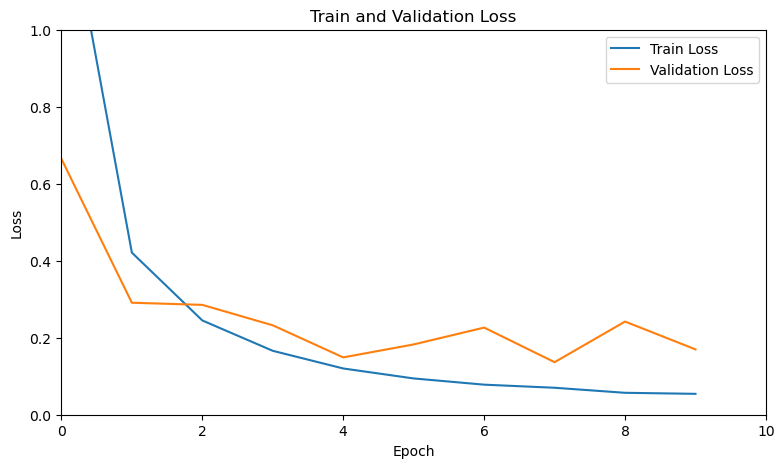

In [ ]:
plt.figure(figsize = (20,5))
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

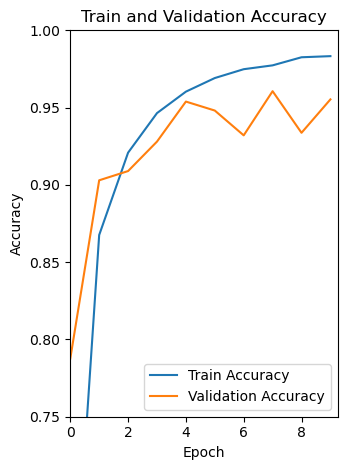

In [ ]:
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [ ]:
loss, accuracy = model.evaluate(test_gen)

550/550 [==============================] - 25s 44ms/step - loss: 0.1698 - accuracy: 0.9553


In [ ]:
print('Test loss: {:.2f}%'.format(loss * 100))
print('Test accuracy: {:.2f}%'.format(accuracy * 100))

Test loss: 16.98%
Test accuracy: 95.53%


In [ ]:
# class_names = sorted(os.listdir("/input/phyto-plant-disease-detection/Augmented Plant Diseases/Augmented Plant Diseases/train"))
# num_classes = len(class_names)

y_true = []
predictions = []

for x, y in test_gen:
    y_true.extend(y.numpy())
    predictions.extend(np.argmax(model.predict(x), axis=1))

y_true = np.array(y_true).flatten()
predictions = np.array(predictions).flatten()

1/1 [==============================] - 0s 135ms/step


In [ ]:
print("Precision Score : {:.2f} %".format(precision_score(y_true, predictions, average='micro') * 100))

Precision Score : 95.53 %


<Figure size 2000x500 with 0 Axes>

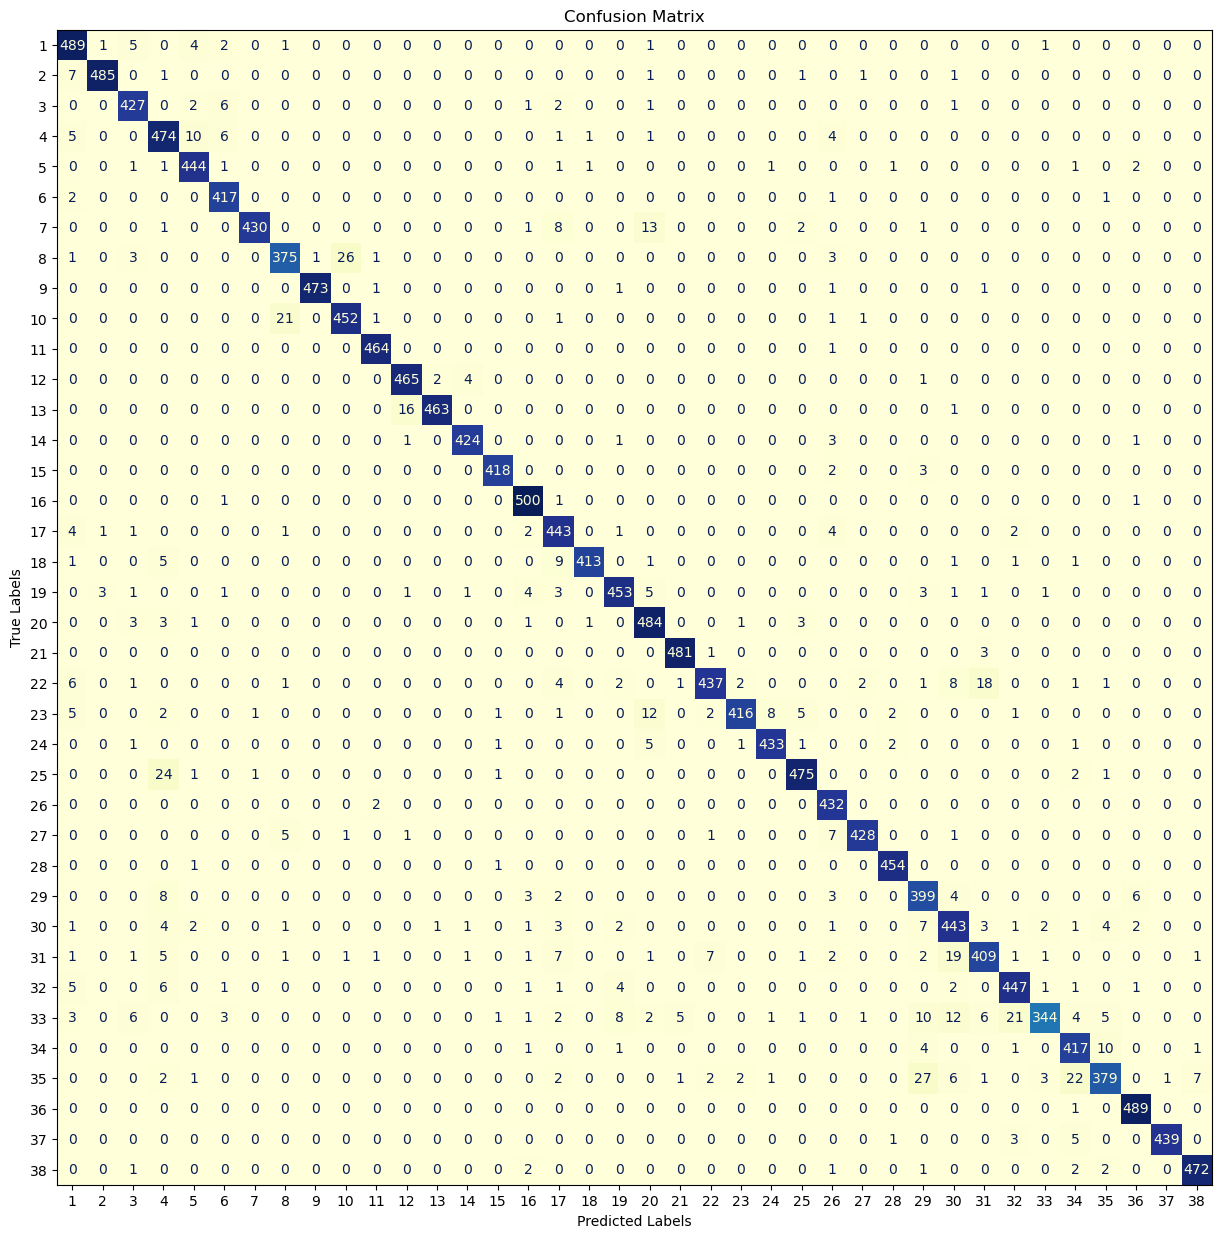

In [ ]:
confusion_mtx = confusion_matrix(y_true, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mtx,display_labels=list(range(1,39)))

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()